# Assignment 2 weather
********
<br>
Author: Filipe Carvalho<br><br>

In this assignment I create a nice plot of the temperature over time based on data from [weatherreadings1.csv](/Users/filipecarvalho/Desktop/PFDA-courseware/assignment/weatherreadings1.csv)


In [2]:
# Import the appropriate packages

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt


In [4]:
# Define the path of my file
file_path = '/Users/filipecarvalho/Desktop/PFDA-courseware/assignment/weatherreadings1.csv'

# Reading the CSV file
df = pd.read_csv(file_path)

# Display the first few rows
# print(df.head()) - this was used to have an idea of the headings, but the data showed a bit messed. So, I opted to use the name of the columns instead.

# Display the names of the columns
print(df.columns)

Index(['siteId', 'reportStartDateTime', 'reportEndDateTime', 'collectionName',
       'isPublic', 'isLatestVersion', 'observationType', 'softwareType',
       'windDirection', 'relativeHumidity', 'windSpeed_MilePerHour',
       'windSpeed_MetrePerSecond', 'dryBulbTemperature_Fahrenheit',
       'dryBulbTemperature_Celsius', 'wetBulbTemperature_Fahrenheit',
       'wetBulbTemperature_Celsius', 'rainfallAmount_Inch',
       'rainfallAmount_Millimetre', 'rainfallRate_InchPerHour',
       'rainfallRate_MillimetrePerHour', 'airPressure_InchOfMercury',
       'airPressure_Hectopascal', 'dewPointTemperature_Fahrenheit',
       'dewPointTemperature_Celsius', 'isOfficial', 'isDcnn', 'longitude',
       'latitude', 'height', 'id', 'localReportEndDateTime', 'externalSiteId',
       'createdDateTime', 'version', 'externalId'],
      dtype='object')


It seems from looking in the columns above that there are 4 columns informing time 'reportStartDateTime', 'reportEndDateTime', 'localReportEndDateTime' and 'createdDateTime'. The only column that has different data from the other columns is 'createdDateTime'. For this assignment 'reportStartDateTime' will be used as its data is the same as the other two columns related to time and shows periodic data collection throughout the rows in the dataset.

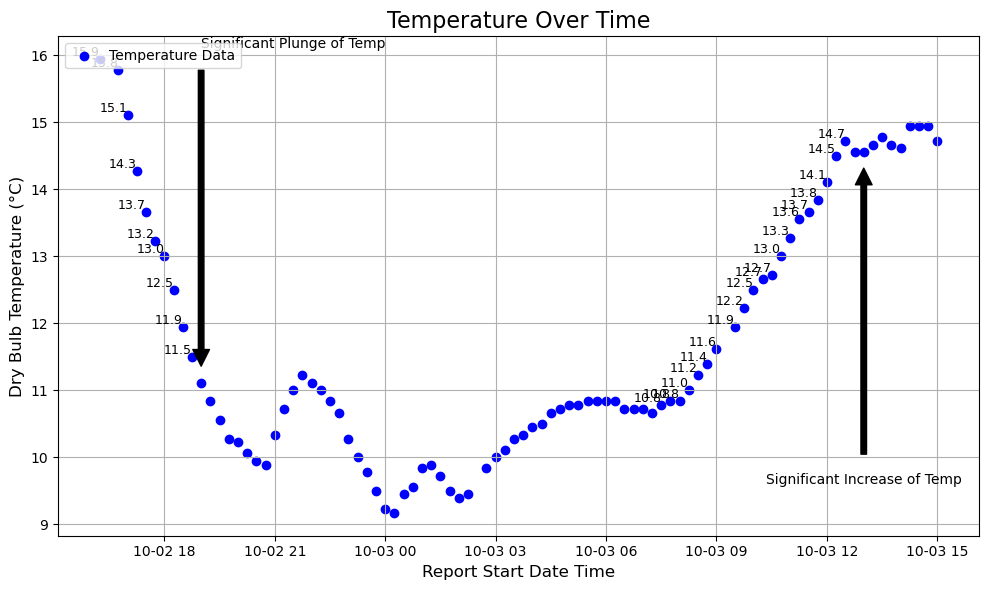

In [26]:
# Extract the required columns
x = pd.to_datetime(df['reportStartDateTime'])  # x-axis: Convert to datetime if it's not already
y = df['dryBulbTemperature_Celsius']  # y-axis

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Temperature Data')

# Add plot elements
plt.title('Temperature Over Time', fontsize=16)
plt.xlabel('Report Start Date Time', fontsize=12)
plt.ylabel('Dry Bulb Temperature (°C)', fontsize=12)
plt.legend(loc='upper left')

# Add grid for better readability
plt.grid(True)

# Highlight a specific point with a note and an arrow
highlight_x1 = x.iloc[10]  # Example point to highlight, adjust as needed
highlight_y1 = y.iloc[10]
plt.annotate('Significant Plunge of Temp', 
             xy=(highlight_x1, highlight_y1), 
             xytext=(highlight_x1, highlight_y1 + 5),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Highlight a specific point with a note and an arrow for a significant increase
highlight_x2 = x.iloc[80]  # Example point to highlight, adjust as needed
highlight_y2 = y.iloc[80]

# Set the text position just above the point to keep it centralized
plt.annotate('Significant Increase of Temp', 
             xy=(highlight_x2, highlight_y2), 
             xytext=(highlight_x2, highlight_y2 - 5),  # Positioning text above
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center',  # Center the text horizontally
             verticalalignment='bottom')  # Align text above the arrow

# Show data values on the plot (for demonstration, limited to first 10 points for clarity)
for i in range(10):
    plt.text(x[i], y[i], f'{y[i]:.1f}', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

# Show data values on the plot (for demonstration, limited to first 10 points for clarity)
for j in range(len(y)-30,len(y)-10):
    plt.text(x[j], y[j], f'{y[j]:.1f}', fontsize=9, verticalalignment='bottom', horizontalalignment='right')

# Display the plot
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()